In [28]:
import functions as fn
fn = reload(fn)

In [27]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [8]:
CURRENT_FRAME = 0
def GetNextFrame():
    global CURRENT_FRAME
    CURRENT_FRAME += 1
    return CURRENT_FRAME-1

In [9]:
import lsst.afw.image as afwImage
import lsst.obs.decam as obs_decam

In [10]:
import os
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
# import lsst.afw.display as afwDisplay

import lsst.afw.geom as afwGeom
import lsst.afw.detection as afwDetect
import lsst.afw.geom.ellipses as afwEllipse
import lsst.afw.cameraGeom as cameraGeom
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
fn.CoaddExposures([496489,496492], outnumber=1, verbose=True)



Coadding [496489, 496492]
adding hdu 1 for file 2 of 2
adding hdu 2 for file 2 of 2
adding hdu 3 for file 2 of 2
adding hdu 4 for file 2 of 2
adding hdu 5 for file 2 of 2
adding hdu 6 for file 2 of 2
adding hdu 7 for file 2 of 2
adding hdu 8 for file 2 of 2
adding hdu 9 for file 2 of 2
adding hdu 10 for file 2 of 2
adding hdu 11 for file 2 of 2
adding hdu 12 for file 2 of 2
adding hdu 13 for file 2 of 2
adding hdu 14 for file 2 of 2
adding hdu 15 for file 2 of 2
adding hdu 16 for file 2 of 2
adding hdu 17 for file 2 of 2
adding hdu 18 for file 2 of 2
adding hdu 19 for file 2 of 2
adding hdu 20 for file 2 of 2
adding hdu 21 for file 2 of 2
adding hdu 22 for file 2 of 2
adding hdu 23 for file 2 of 2
adding hdu 24 for file 2 of 2
adding hdu 25 for file 2 of 2
adding hdu 26 for file 2 of 2
adding hdu 27 for file 2 of 2
adding hdu 28 for file 2 of 2
adding hdu 29 for file 2 of 2
adding hdu 30 for file 2 of 2
adding hdu 31 for file 2 of 2
adding hdu 32 for file 2 of 2
adding hdu 33 for file 

In [35]:
def getCCDnameFromNum(num):
    import lsst.daf.persistence as dafPersist
    try:
        camera
        temp_camera = camera
    except NameError:
        temp_butler = dafPersist.Butler('/nfs/lsst2/photocalData/data/decam/rerun/3')
        temp_camera = temp_butler.get('camera')
        del temp_butler

    name_dict = dict([(_.getName(), _.getId()) for _ in temp_camera])
    num_dict = dict([(_.getId(), _.getName()) for _ in temp_camera])
    try:
        return num_dict[num]
    except:
        return ''
    
def getCCDNumFromName(name):
    import lsst.daf.persistence as dafPersist
    try:
        camera
        temp_camera = camera
    except NameError:
        temp_butler = dafPersist.Butler('/nfs/lsst2/photocalData/data/decam/rerun/3')
        temp_camera = temp_butler.get('camera')
        del temp_butler

    name_dict = dict([(_.getName(), _.getId()) for _ in temp_camera])
    num_dict = dict([(_.getId(), _.getName()) for _ in temp_camera])
    try:
        return name_dict[name]
    except:
        return ''

In [51]:
plt.rcParams['figure.figsize'] = (13, 8) if False else (10, 6)


2


In [79]:
butler = dafPersist.Butler('/nfs/lsst2/photocalData/data/decam/rerun/5')

In [36]:
def ds9_one_ccd(rerun, visit, product, ccdname, binning=8, date='2015-11-25',filter='r', showMaskPlanes=False):
    import lsst.daf.persistence as dafPersist
    import lsst.afw.display.ds9 as ds9
    import lsst.afw.cameraGeom.utils as camGeomUtils

    butler = dafPersist.Butler('/nfs/lsst2/photocalData/data/decam/rerun/'+str(rerun))
    camera = butler.get("camera")

    exp = butler.get(product, visit=visit,date=date, filter=filter, ccdnum=getCCDNumFromName(ccdname), immediate=True)
    
    if showMaskPlanes:
        image = exp
    else:
        image = exp.getMaskedImage().getImage()
    
    title = 'rerun %s, visit %s, %s, %s(%s)'%(rerun, visit, product, ccdname, getCCDNumFromName(ccdname))
    ds9.mtv(image, frame=GetNextFrame(), title=title)


def ds9_focalplane(rerun, visit, product, binning=8, date='2015-11-25',filter='r'):
    import lsst.daf.persistence as dafPersist
    import lsst.afw.display.ds9 as ds9
    import lsst.afw.cameraGeom.utils as camGeomUtils

    butler = dafPersist.Butler('/nfs/lsst2/photocalData/data/decam/rerun/'+str(rerun))
    camera = butler.get("camera")

    imageSource = camGeomUtils.ButlerImage(butler, product, visit=visit, verbose=True, date=date, filter=filter)
    image = camGeomUtils.showCamera(camera, imageSource=imageSource, title=str(visit), binSize=binning)
    
    title = 'rerun %s, visit %s, %s, %s-pix binning'%(rerun, visit, product, binning)
    ds9.mtv(image, frame=GetNextFrame(), title=title)


In [46]:
# ds9_one_ccd(5,496547,'calexp', 'S4')
# ds9_focalplane(5,9000001,'calexp',binning=1)
ds9_focalplane(6,496492,'calexp')
# ds9_one_ccd(6,496492,'calexp', 'N3', showMaskPlanes=True)

Reading 61: 
  File "src/fits.cc", line 1067, in lsst::afw::fits::Fits::Fits(const string&, const string&, int)
    cfitsio error: could not open the named file (104) : Opening file '/nfs/lsst2/photocalData/data/decam/rerun/6/0496492/calexp/calexp-0496492_61.fits' with mode 'r' {0}
lsst::afw::fits::FitsError: 'cfitsio error: could not open the named file (104) : Opening file '/nfs/lsst2/photocalData/data/decam/rerun/6/0496492/calexp/calexp-0496492_61.fits' with mode 'r''



In [80]:
import lsst.afw.display.ds9 as display
import lsst.afw.cameraGeom.utils as camGeomUtils
camGeomUtils = reload(camGeomUtils)

camera = butler.get("camera")
# visit = 9000001
visit = 496547
# visit = 496485
binning = 8

# product = 'calexp'
product = 'postISRCCD'
# product = 'raw'

date = '2015-11-25'
filter = 'r'

imageSource = camGeomUtils.ButlerImage(butler, product, visit=visit, verbose=True, date=date, filter=filter)

try:
    mos
except NameError:
    mos = dict()

mos[str([visit,binning,product])] = camGeomUtils.showCamera(camera, imageSource=imageSource, title=str(visit), binSize=binning)#,
#                                      frame=frame)#, ccdKey="ccdnum")

ds9.mtv(mos[str([visit,binning,product])], frame=GetNextFrame(), title=str(visit)+product+',binned_'+str(binning))

Reading 61: 
  File "src/fits.cc", line 1067, in lsst::afw::fits::Fits::Fits(const string&, const string&, int)
    cfitsio error: could not open the named file (104) : Opening file '/nfs/lsst2/photocalData/data/decam/rerun/5/0496547/postISR/postISR-0496547_61.fits' with mode 'r' {0}
lsst::afw::fits::FitsError: 'cfitsio error: could not open the named file (104) : Opening file '/nfs/lsst2/photocalData/data/decam/rerun/5/0496547/postISR/postISR-0496547_61.fits' with mode 'r''



In [ ]:
ds9_one_ccd(6,496492,'calexp', 'N3', showMaskPlanes=True)

In [19]:
getCCDnameFromNum(61)

'N30'

In [9]:
getCCDNumFromName('S12')

23

In [ ]:
# dataId = dict(visit=496495)
dataId = dict(visit=496547)

calexps = {}
for ccdnum in range(1, 63):
    calexps[ccdnum] = butler.get("calexp", dataId, ccdnum=ccdnum, immediate=True)
    print 'Fetched ' + calexps[ccdnum].getDetector().getName(), calexps[ccdnum].getDetector().getId()

In [99]:
dataId = dict(visit=496547, ccdnum=28)

src = butler.get("icSrc", dataId, immediate=True)
calexp = butler.get("calexp", dataId)
if True:
    ds9.mtv(calexp.getMaskedImage().getImage(), frame=62)
else:
    ds9.erase()
with ds9.Buffering():
    i = 1
    for s in src:
        if s.getFootprint().getNpix() > 1:
            print i
            i += 1
            ellip = s.getShape()
            ellip = afwEllipse.Axes(ellip)

            if ellip.getDeterminantRadius() > 10:
                ds9.dot('o', *s.getCentroid(), size=10, frame=62)
                print s.getCentroid()

1
2
3
4
5
6
7
(1342.2, 2170.6)
8


In [114]:
a, b = s.getCentroid()
# ds9.dot()
# print type(s.getCentroid())

print a

516.276370576


In [93]:
for s in src:
#     print s.getId(), s.getFootprint().getNpix()
    if s.getId()!=213265432851775495: continue
    print s.getId(), s.getCentroid()
    print s.getApFlux(), s.getCalibFlux(), s.getInstFlux(), s.getModelFlux(), s.getPsfFlux()
    print 'getApFlux     = %.1f'% s.getApFlux()
    print 'getCalibFlux  = %.1f'% s.getCalibFlux()
    print 'getInstFlux   = %.1f'% s.getInstFlux()
    print 'getModelFlux  = %.1f'% s.getModelFlux()
    print 'getPsfFlux    = %.1f'% s.getPsfFlux()
    
    flux = fn.SumSourcePixels(s, calexps[28].getMaskedImage().getImage())
    print 'footprint sum = %.1f'% flux

# b.getArea()

213265432851775495 (1342.2, 2170.6)
52794.2460938 799747.012085 15392875.458 15392875.458 58704.490332
getApFlux     = 52794.2
getCalibFlux  = 799747.0
getInstFlux   = 15392875.5
getModelFlux  = 15392875.5
getPsfFlux    = 58704.5
footprint sum = 23808826.0


In [115]:
print src.schema
# print s.getId() & 0xffff
# if (src.getId() & 0xffff) == -122:

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
    (Field['Flag'](name="flags_negative", doc="set if source was detected as significantly negative"), Key['Flag'](offset=32, bit=0)),
    (Field['D'](name="initial_base_GaussianCentroid_x", doc="centroid from Gaussian Centroid algorithm", units="pixels"), Key<D>(offset=40, nElements=1)),
    (Field['D'](name="initial_base_GaussianCentroid_y", doc="centroid from Gaussian Centroid algorithm", units="pixels"), Key<D>(offset=48, nElements=1)),
    (Field['Flag'](name="initial_base_GaussianCentroid_flag", doc="general failure flag, set if anything went wrong"), Key['Flag'](offset=32, bit=1)),
    (Field['Flag']

In [ ]:
ccdName = 'N11'
ccdnum = [_.getId() for _ in camera if _.getName() == ccdName][0]

dataId = dict(visit=496559, ccdnum=ccdnum)
calexp = butler.get("raw", dataId)
srcs = butler.get("src", dataId)

frame = 0
if True:
    ds9.mtv(calexp, frame=frame, 
            title='%d %s' % (dataId["visit"], calexp.getDetector().getName()))
else:
    ds9.erase(frame=frame)
    
if False:
    with ds9.Buffering():
        for s in srcs:
            if s.getModelFlux() > 1e6:
                ellip = s.getShape()
                ellip = afwEllipse.Axes(ellip)

                if ellip.getA() > 10 and ellip.getB() > 5:
                    ds9.dot(ellip, *s.getCentroid(), frame=frame, size=20)
                    #ds9.dot('%g' % s.getModelFlux(), *s.getCentroid(), frame=frame)
                    ds9.dot('%.1f %.1f' % (ellip.getA(), ellip.getB()), *s.getCentroid(), frame=frame)

In [ ]:
nid = dict([(_.getName(), _.getId()) for _ in camera])
print nid['S16']

In [ ]:
# import lsst.afw.image as afwImage
# import lsst.afw.display as afwDisplay
# import numpy as np

# data = np.zeros((10,10), dtype=np.float32)
# img = afwImage.ImageF(data)
# afwDisplay.ds9.mtv(img,frame=0)

In [ ]:
# ds9.mtv(mos['496473'], frame=0, title='473,postISR')
# ds9.mtv(mos['496473-full'], frame=0, title='473,postISR')
# ds9.mtv(mos['496473'], frame=100, title='473,postISR,binned')
ds9.mtv(mos['496547-bias'], frame=3, title='496547-bias,calexp,binned')

In [ ]:
ims = {}
# product = 'postISRCCD'
product = 'calexp'

exp_cdd = '496453,20'
ims[exp_cdd]= butler.get(product, visit=496453, ccdnum=4)
ds9.mtv(ims[exp_cdd], frame=1, title = exp_cdd + product)

In [ ]:
# product = 'postISRCCD'
ccd_ims = {}
product = 'calexp'

for i in range(1,10):
    exp_cdd = '496473,%s'%i
    ccd_ims[exp_cdd]= butler.get(product, visit=496473, ccdnum=i)
    ds9.mtv(ccd_ims[exp_cdd], frame=i, title = exp_cdd + product)

In [ ]:
import lsst.afw.display.ds9 as display
import lsst.afw.cameraGeom.utils as camGeomUtils
camGeomUtils = reload(camGeomUtils)

camera = butler.get("camera")
frame, visit = 1, 496473
# frame, visit = 1, 496372

# product = 'calexp'
product = 'postISRCCD'
# product = 'raw'

date = '2015-11-26'
filter = 'r'

# imageSource = camGeomUtils.ButlerImage(butler, product, visit=visit, verbose=True)
# imageSource = camGeomUtils.ButlerImage(butler, product, visit=visit, verbose=True, date=date, filter=filter)

im = butler.get(product, visit=496473, ccdnum=20)

ds9.mtv(im, frame=1)
# imageSource.

# try:
#     mos
# except NameError:
#     mos = dict()

# mos['496577-7'] = camGeomUtils.showCamera(camera, imageSource=imageSource, title=str(visit), binSize=8)#,
# #                                      frame=frame)#, ccdKey="ccdnum")

In [ ]:
plt.imshow(mos['496473-1'].getArray(),cmap = 'gray', figsize=(10,10))

In [ ]:
ds9.pan(420,1779, frame=5)

In [ ]:
data = np.zeros((10,10), dtype = np.float32)
img = afwImage.ImageF(data)
ds9.mtv(img,frame=6)

In [ ]:
getCCDnameFromNum(32)
getCCDNumFromName('S1')

In [ ]:
ds9.mtv(mos['496453'], frame=100, title='496453,bin8,calexp')

In [ ]:
test = {}
test ['1'] = 1

In [ ]:
print test


In [ ]:
butler4 = dafPersist.Butler('/nfs/lsst2/photocalData/data/decam/rerun/4')
butler5 = dafPersist.Butler('/nfs/lsst2/photocalData/data/decam/rerun/5')

date = '2015-11-25'
filter = 'r'

frame, visit = 1, 496473
ccdnum = 20
product = 'calexp'
# product = 'postISRCCD'
# product = 'raw'

im4 = butler4.get(product, visit=496473, ccdnum=ccdnum)
im5 = butler5.get(product, visit=496473, ccdnum=ccdnum)

ds9.mtv(im4, frame=0, title='4,%s,%s,%s'%(visit,product,ccdnum))
ds9.mtv(im5, frame=1, title='5,%s,%s,%s'%(visit,product,ccdnum))

In [ ]:


SideBySide([im4,im5], colormap='CMRmap', half_stretch=1, smoothing=2, saveas='/nfs/lsst2/photocalData/data/figs/bias_vs_no_bias_496473_ccd_20.png')
# SideBySide(im4,im5, saveas='save.png')

In [ ]:
data = im4.getMaskedImage().getImage().getArray()

In [ ]:
np.mean(data)

In [ ]:
np.median(data)

In [ ]:
mean, stddev = getClippedMeanandStddev(data)
print mean
print stddev

In [ ]:
butler4 = dafPersist.Butler('/nfs/lsst2/photocalData/data/decam/rerun/4')

date = '2015-11-25'
filter = 'r'

visit = 496547
chipName = 'N30'
ccdnum = getCCDNumFromName(chipName)
product = 'calexp'

im4 = butler4.get(product, visit=496473, ccdnum=ccdnum)

ds9.mtv(im4, frame=2, title='%s,%s,%s'%(visit,product,chipName))


In [ ]:
ds9.mtv(mos['496547-bias'], frame = 10)

In [ ]:
print 'hello'

In [ ]:
# product = 'postISRCCD'
ccd_ims = {}
visit = 496547
product = 'calexp'

for i in range(1,63):
    visit_cdd = '%s,%s'%(visit,i)
    ccd_ims[visit_cdd]= butler.get(product, visit=visit, ccdnum=i)
    ds9.mtv(ccd_ims[visit_cdd], frame=i, title = visit_cdd + getCCDnameFromNum(i) + product)

In [ ]:
# focal_plane_to_image(mos['496547-camera'].getArray(), '/nfs/lsst2/photocalData/data/figs/fp_test.png')
# print 'png'
focal_plane_to_image(mos['496547-camera-full'].getArray(), '/nfs/lsst2/photocalData/data/figs/fp_test.png')
print 'jpg'
# focal_plane_to_image(mos['496547-camera-full'].getArray(), '/nfs/lsst2/photocalData/data/figs/fp_test_full.pdf')
# print 'pdf'

In [ ]:
ds9.mtv(mos['496547-camera-binned'], frame = 100, title='test_image')

In [ ]:
dataId = dict(visit=496547)
ccdnum = getCCDNumFromName('S4')
calexp = butler.get("calexp", dataId, ccdnum=ccdnum, immediate=True)
print calexp.getDetector().getName(), calexp.getDetector().getId()

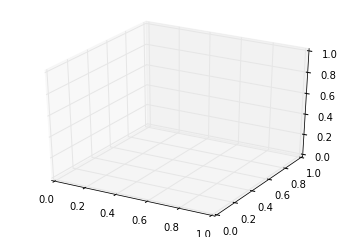

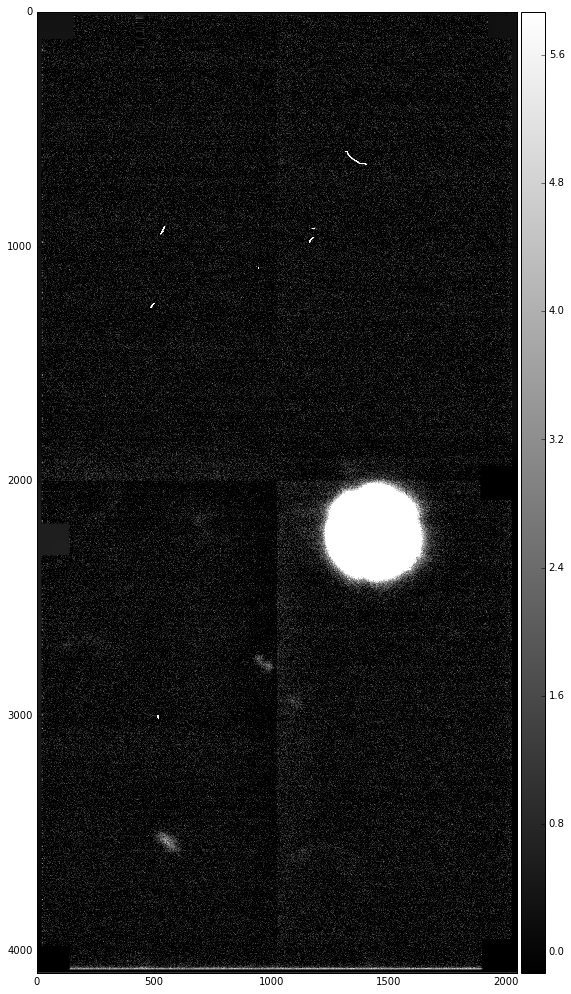

In [117]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

data = calexps[28].getMaskedImage().getImage().getArray()
# X, Y, Z = axes3d.get_test_data(0.05)

fn.SideBySide([calexps[28]])

# ax.plot_surface(data, rstride=8, cstride=8, alpha=0.3)
# cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
# cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
# cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

# ax.set_xlabel('X')
# ax.set_xlim(-40, 40)
# ax.set_ylabel('Y')
# ax.set_ylim(-40, 40)
# ax.set_zlabel('Z')
# ax.set_zlim(-100, 100)

# plt.show()



# ds9.mtv(calexp, frame=100)

In [ ]:
print data.shape

In [223]:
sub_data=data[2050:2450,1200:1600]
# sub_data=data[2150:2250,1300:1400]
# from scipy.ndimage.sobel import sobel

import scipy.ndimage as im_process
from scipy.ndimage.filters import gaussian_filter


deriv = im_process.laplace(gaussian_filter(sub_data,3), mode='constant')

spot_cent = [1406,2350]
spot_rad = 19
spot_psf = gaussian_filter(data[spot_cent[1]-spot_rad:spot_cent[1]+spot_rad,spot_cent[0]-spot_rad:spot_cent[0]+spot_rad],1)
spot_psf = spot_psf/np.max(spot_psf)



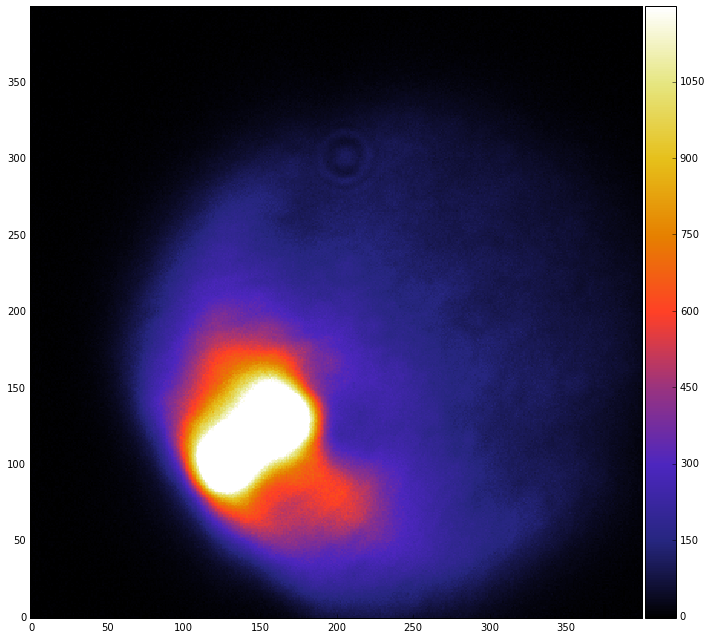

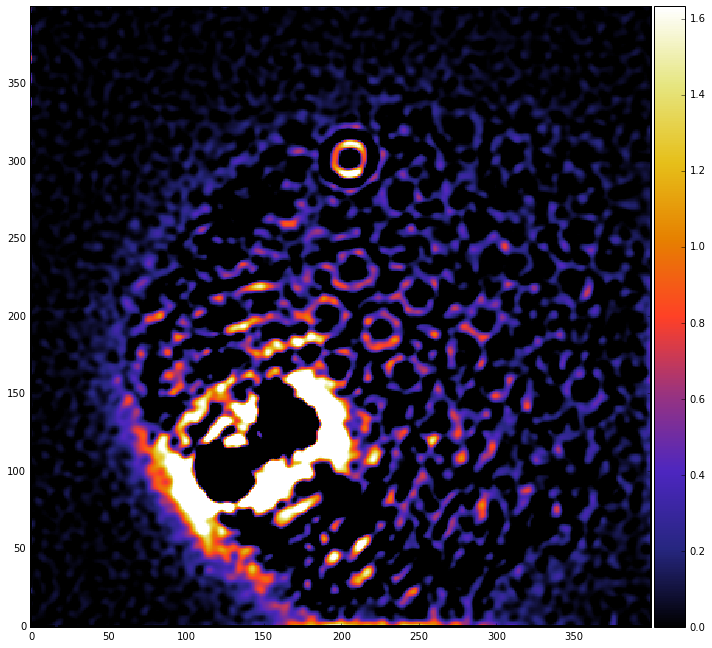

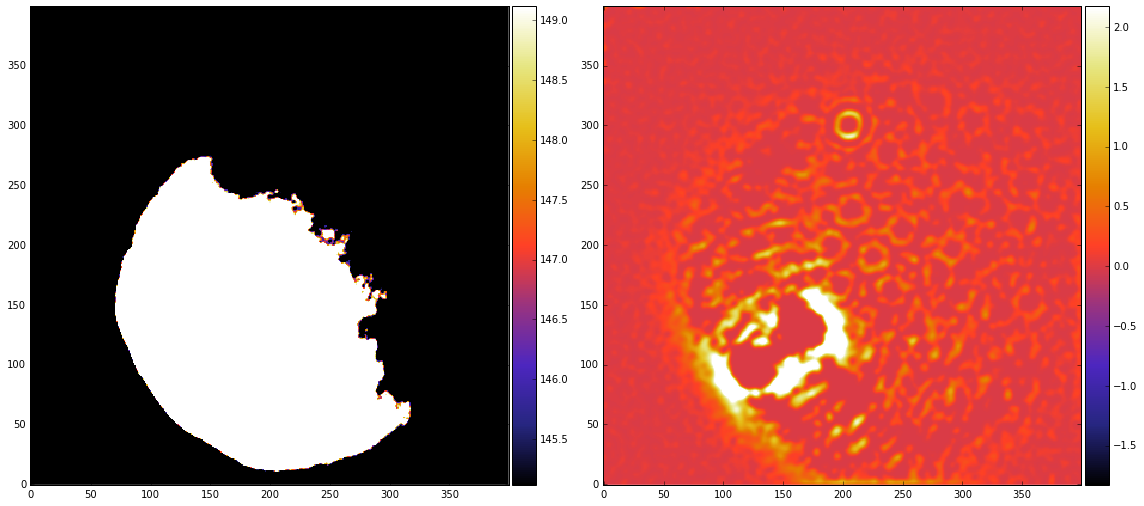

In [400]:
spot_cent = [205,301]
spot_rad = 19
spot_psf = gaussian_filter(deriv[spot_cent[1]-spot_rad:spot_cent[1]+spot_rad,spot_cent[0]-spot_rad:spot_cent[0]+spot_rad],0)
# spot_psf = spot_psf/np.max(spot_psf)


fn.ShowSpot(sub_data, smoothing=0, half_stretch='auto')

thr_low = 0
deriv = im_process.laplace(gaussian_filter(sub_data,2.8), mode='constant')
deriv[deriv<thr_low]=thr_low
fn.ShowSpot(deriv, smoothing=0, half_stretch='auto')

fn.SideBySide([sub_data,deriv],colormap='CMRmap', half_stretch=2, fix_scales=False)



-6.10352e-05 0.00012207
-94.8485 2.40503
-96.4424 7.42114
-99.3853 13.7186
-103.19 19.21
-107.316 24.9167
-111.796 28.6989
-118.133 33.0065
-124.615 42.2591
-130.986 59.6082


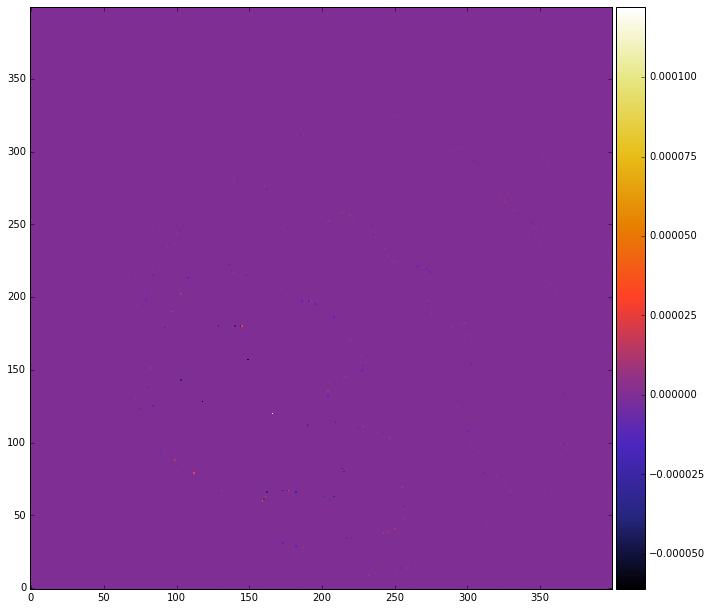

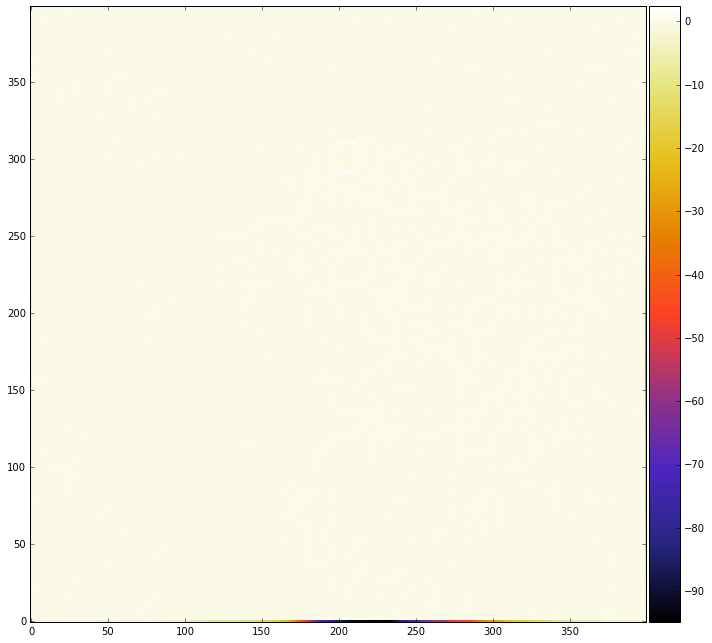

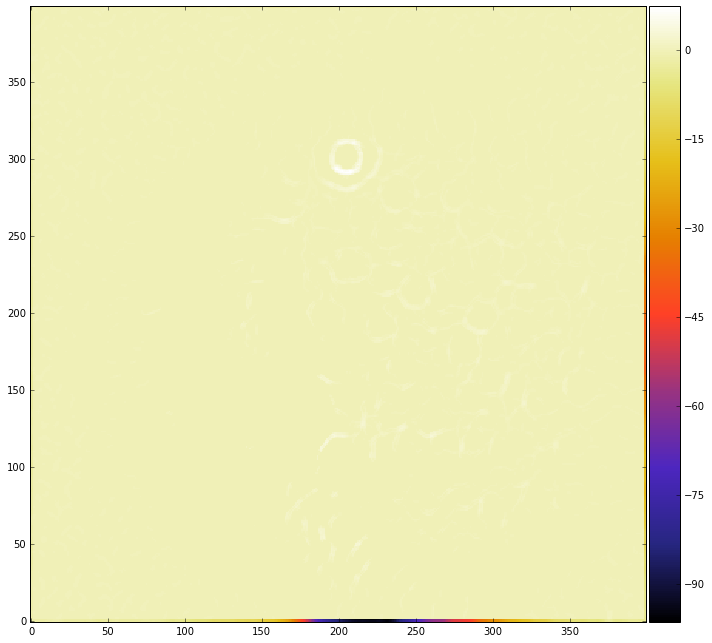

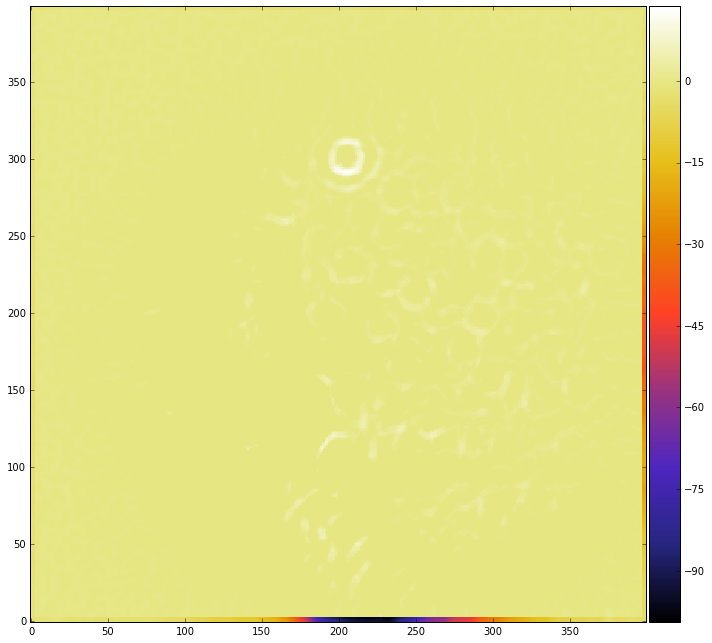

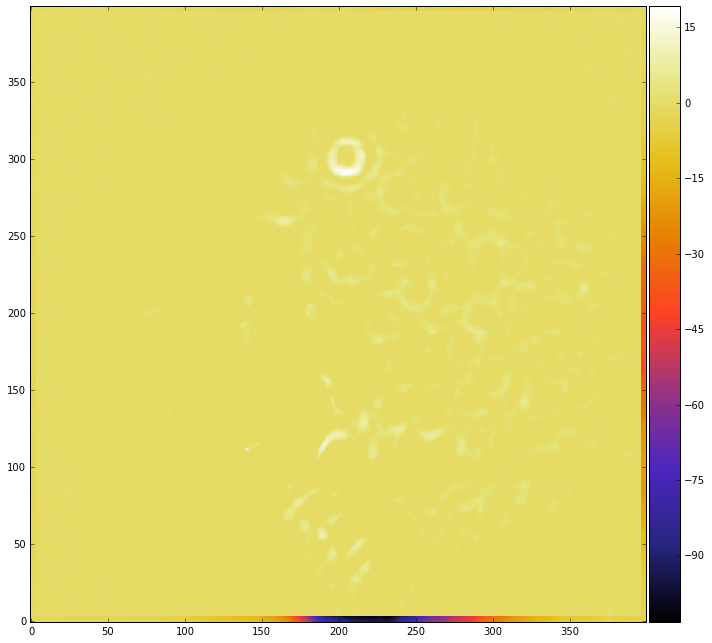

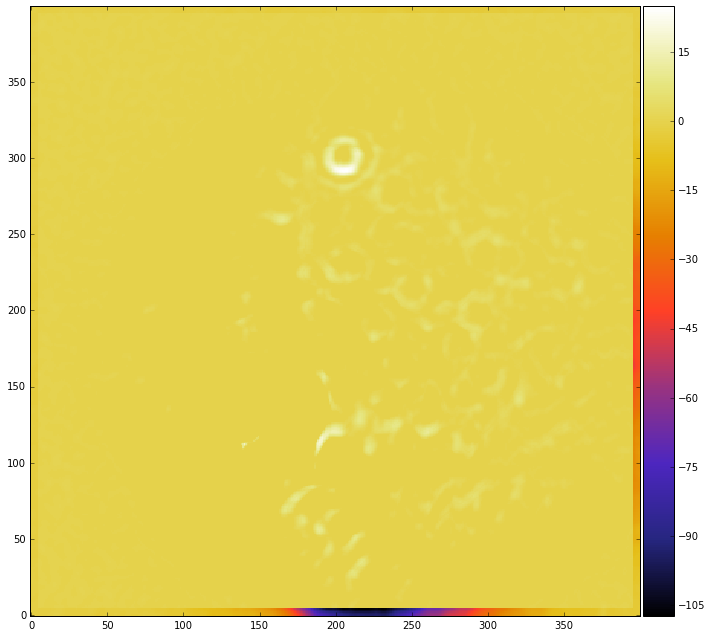

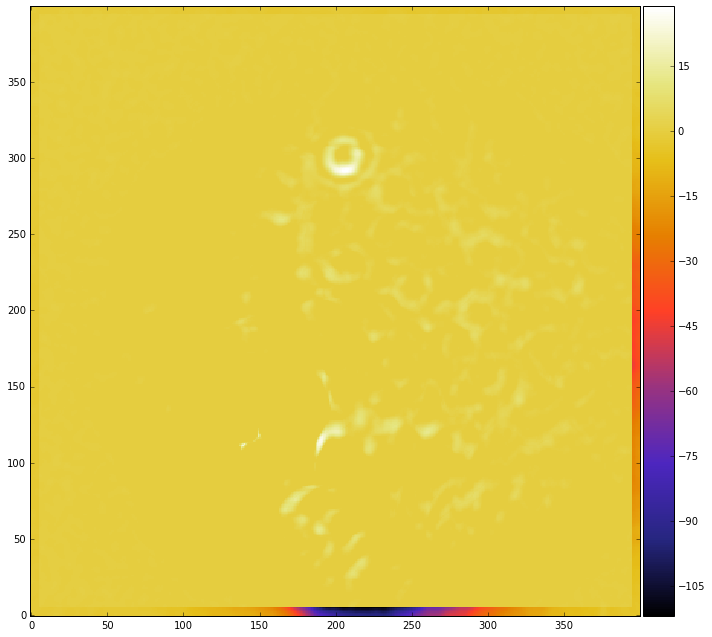

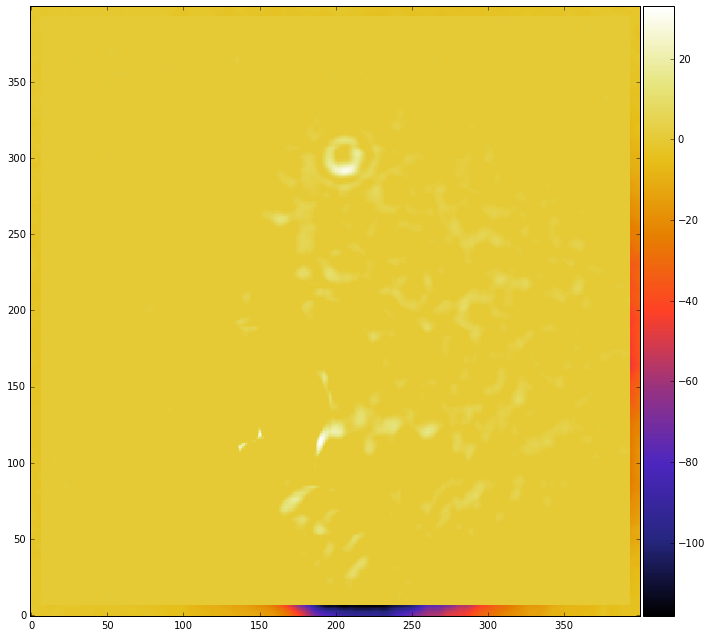

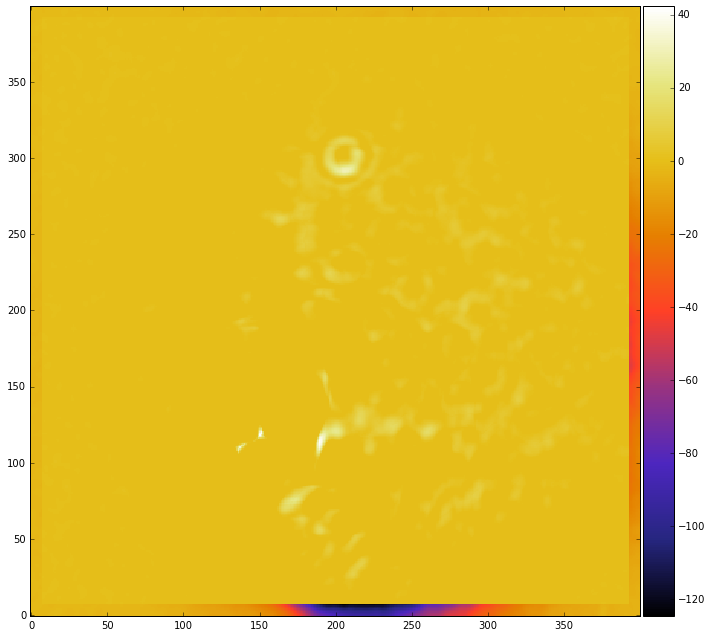

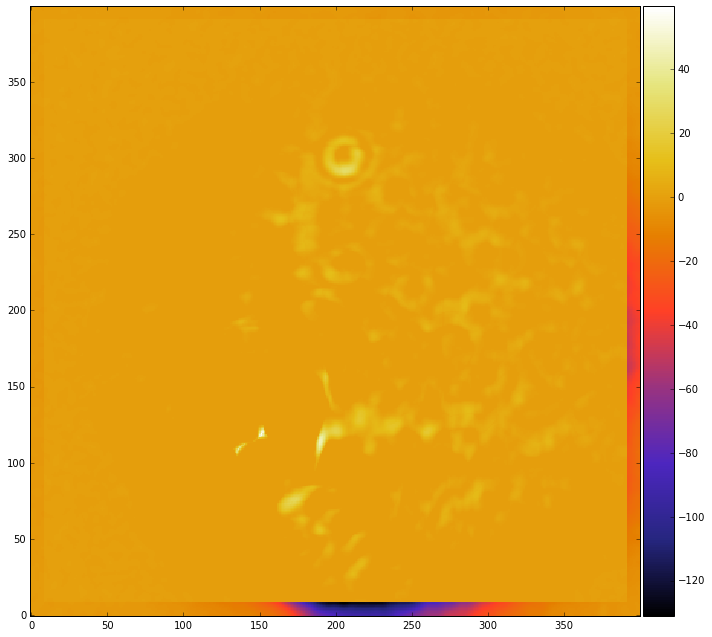

In [320]:
import skimage.morphology as morph

for size in range(10):
    disk = morph.disk(size)
    white_hat = im_process.black_tophat(gaussian_filter(sub_data,2), mode='constant', structure=disk)
    fn.ShowSpot(white_hat, smoothing=0, half_stretch=-1)

# white_hat = im_process.white_tophat(gaussian_filter(sub_data,2), mode='constant', structure=spot_psf)
# fn.ShowSpot(white_hat, smoothing=0, half_stretch=3)
# white_hat = im_process.white_tophat(gaussian_filter(sub_data,2), mode='constant', structure=disk)
# fn.ShowSpot(white_hat, smoothing=0, half_stretch=3)

# fn.ShowSpot(spot_psf, smoothing=0, half_stretch=-1)
# fn.ShowSpot(sub_data, smoothing=0, half_stretch='auto')
# fn.ShowSpot(deriv, smoothing=0, half_stretch=3)
# fn.ShowSpot(white_hat, smoothing=0, half_stretch=3)

In [ ]:
    
SurfPlot(sub_data[100:350,100:350])

In [ ]:
def BarPlot(data):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
#     x, y = np.random.rand(2, 100) * 4
#     hist, xedges, yedges = np.histogram2d(x, y, bins=4)

    ncols, nrows = data.shape

    elements = (ncols * nrows)
    xpos, ypos = np.meshgrid(np.linspace(0, ncols, ncols),np.linspace(0, nrows, nrows))

    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(elements)
    dx = 1 * np.ones_like(zpos)
    dy = dx.copy()
    dz = data.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    plt.show()
    
    
    
# temp_data = np.ndarray.zeros((10,10))
# temp_data = np.random.rand(10, 10) * 4
BarPlot(sub_data)

In [ ]:
print np.percentile(sub_data, 25)
print np.max(sub_data)

In [ ]:
import s

In [12]:
# import lsst.ip.isr.isr.createPSF as createPSF

# FWHM = 2 ## stands for full-width half-max of the Gaussian which models the PSF
# psf = measAlg.createPSF("DoubleGaussian", 15, 15, FWHM/(2*math.sqrt(2*math.log(2))))

# psf = createPSF(2)

import lsst.meas.algorithms.installGaussianPsf as installPsf

print installPsf.

2.35482004503
